# Compare embeddings

Generate figures for the thesis to show training progress of different embeddings

In [2]:
import pandas as pd
from ray.tune import ExperimentAnalysis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(context='paper', style="darkgrid", font="serif", palette=None, font_scale=1.1)

In [65]:
df_disprot = ExperimentAnalysis("../data/results/embeddings_compare/compare_embeddings_binary_disprot").results_df
df_fldpnn = ExperimentAnalysis("../data/results/embeddings_compare/compare_embeddings_binary_fldpnn").results_df
df_chezod1 = ExperimentAnalysis("../data/results/embeddings_compare/compare_embeddings_chezod_set1").results_df
df_chezod2 = ExperimentAnalysis("../data/results/embeddings_compare/compare_embeddings_chezod_set2").results_df

In [5]:
label_map = {
    'esm2_t33_650M_UR50D': 'ESM-2 (650M)',
    'esm2_t36_3B_UR50D': 'ESM-2 (3B)',
    'facebook/esm-1b': 'ESM-1b',
    'Rostlab/prot_t5_xl_half_uniref50-enc': 'ProtT5-XL',
    'Rostlab/prot_bert_bfd': 'ProtBert'
}

def plot_metric(ax, grouped_df, metric_col, metric_name, sort_metric):
    items = grouped_df.sort_values([sort_metric], ascending=True)[metric_col]
    labels = [label_map[l] for l in items.keys()]
    ax.barh(np.arange(len(items)), items.values)
    ax.set_yticks(np.arange(len(items)), labels=labels)
    ax.set_title(metric_name)
    ax.set_xlim([min(items.values) * 0.7, max(items.values) * 1.03])

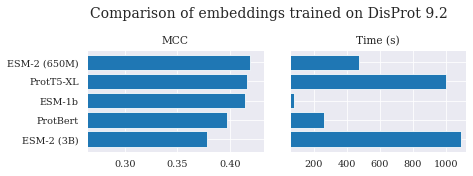

In [6]:
%matplotlib inline
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(6, 2), sharey=True)
fig.tight_layout()

disprot_grouped = df_disprot.groupby(by='config/model_name').mean()
sort_m = 'mcc'
plot_metric(ax1, disprot_grouped, 'mcc', 'MCC', sort_m)
plot_metric(ax2, disprot_grouped, 'time_this_iter_s', 'Time (s)', sort_m)

fig.suptitle('Comparison of embeddings trained on DisProt 9.2', fontsize=14, y=1.2)
fig.savefig('../figures/2022-10-16_embeddings_compare/bars_frozen_disprot_important_metrics.png', bbox_inches='tight')
plt.show()

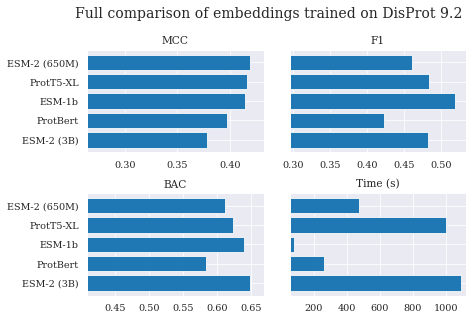

In [7]:
%matplotlib inline
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(6, 4), sharey=True)
fig.tight_layout(h_pad=2)

disprot_grouped = df_disprot.groupby(by='config/model_name').mean()
sort_m = 'mcc'
plot_metric(ax1, disprot_grouped, 'mcc', 'MCC', sort_m)
plot_metric(ax2, disprot_grouped, 'f1', 'F1', sort_m)
plot_metric(ax3, disprot_grouped, 'bac', 'BAC', sort_m)
plot_metric(ax4, disprot_grouped, 'time_this_iter_s', 'Time (s)', sort_m)

fig.suptitle('Full comparison of embeddings trained on DisProt 9.2', fontsize=14, y=1.1)
fig.savefig('../figures/2022-10-16_embeddings_compare/bars_frozen_disprot_metrics.png', bbox_inches='tight')
plt.show()

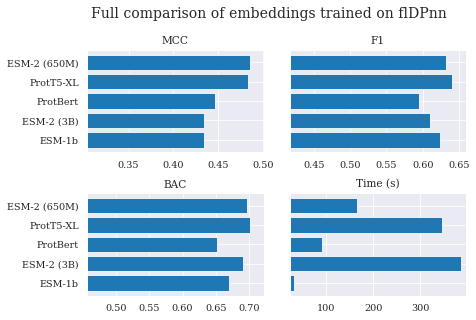

In [8]:
%matplotlib inline
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(6, 4), sharey=True)
fig.tight_layout(h_pad=2)

fldpnn_grouped = df_fldpnn.groupby(by='config/model_name').mean()
sort_m = 'mcc'
plot_metric(ax1, fldpnn_grouped, 'mcc', 'MCC', sort_m)
plot_metric(ax2, fldpnn_grouped, 'f1', 'F1', sort_m)
plot_metric(ax3, fldpnn_grouped, 'bac', 'BAC', sort_m)
plot_metric(ax4, fldpnn_grouped, 'time_this_iter_s', 'Time (s)', sort_m)

fig.suptitle('Full comparison of embeddings trained on flDPnn', fontsize=14, y=1.1)
fig.savefig('../figures/2022-10-16_embeddings_compare/bars_frozen_fldpnn_metrics.png', bbox_inches='tight')
plt.show()

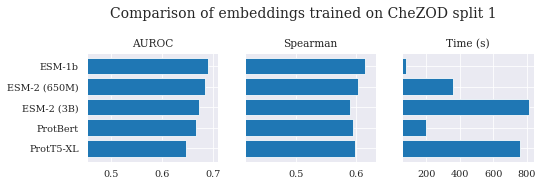

In [61]:
%matplotlib inline
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(8, 2), sharey=True)

chezod1_grouped = df_chezod1.groupby(by='config/model_name').mean()
sort_m = 'auroc'
plot_metric(ax1, chezod1_grouped, 'auroc', 'AUROC', sort_m)
plot_metric(ax2, chezod1_grouped, 'spearman', 'Spearman', sort_m)
plot_metric(ax3, chezod1_grouped, 'time_this_iter_s', 'Time (s)', sort_m)

fig.suptitle('Comparison of embeddings trained on CheZOD split 1', fontsize=14, y=1.2)
fig.savefig('../figures/2022-10-16_embeddings_compare/bars_frozen_chezod1_metrics.png', bbox_inches='tight')
plt.show()

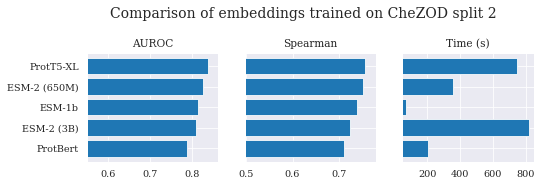

In [60]:
%matplotlib inline
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(8, 2), sharey=True)

chezod2_grouped = df_chezod2.groupby(by='config/model_name').mean()
sort_m = 'auroc'
plot_metric(ax1, chezod2_grouped, 'auroc', 'AUROC', sort_m)
plot_metric(ax2, chezod2_grouped, 'spearman', 'Spearman', sort_m)
plot_metric(ax3, chezod2_grouped, 'time_this_iter_s', 'Time (s)', sort_m)

fig.suptitle('Comparison of embeddings trained on CheZOD split 2', fontsize=14, y=1.2)
fig.savefig('../figures/2022-10-16_embeddings_compare/bars_frozen_chezod2_metrics.png', bbox_inches='tight')
plt.show()

# Fine-tune embeddings

Generate figures for the thesis to show training results of fine-tuned embeddings vs not fine tuned

In [3]:
df_fine_tune_disprot_esm1 = ExperimentAnalysis("../data/results/fine_tuning/fine_tuning_evaluation_disprot_esm1").results_df.dropna(subset=['loss'])
df_fine_tune_disprot_esm2 = ExperimentAnalysis("../data/results/fine_tuning/fine_tuning_evaluation_disprot_esm2").results_df.dropna(subset=['loss'])

df_fine_tune_chezod_esm1 = ExperimentAnalysis("../data/results/fine_tuning/fine_tuning_evaluation_chezod_esm1").results_df.dropna(subset=['loss'])
df_fine_tune_chezod_esm2 = ExperimentAnalysis("../data/results/fine_tuning/fine_tuning_evaluation_chezod_esm2").results_df.dropna(subset=['loss'])

In [4]:
df_fine_tune_disprot_esm1['model_name'] = 'facebook/esm-1b'
df_fine_tune_disprot_esm2['model_name'] = 'esm2_t33_650M_UR50D'

df_fine_tune_chezod_esm1['model_name'] = 'facebook/esm-1b'
df_fine_tune_chezod_esm2['model_name'] = 'esm2_t33_650M_UR50D'

df_fine_tune_disprot = pd.concat([df_fine_tune_disprot_esm1, df_fine_tune_disprot_esm2])
df_fine_tune_disprot['group_col'] = df_fine_tune_disprot['model_name'].str.cat(df_fine_tune_disprot['config/nr_frozen_epochs'].astype(int).astype(str), sep='-')

df_fine_tune_chezod = pd.concat([df_fine_tune_chezod_esm1, df_fine_tune_chezod_esm2])
df_fine_tune_chezod['group_col'] = df_fine_tune_chezod['model_name'].str.cat(df_fine_tune_chezod['config/nr_frozen_epochs'].astype(int).astype(str), sep='-')

In [12]:
df_fine_tune_disprot.groupby(by='group_col').mean()

,loss,acc,bac,f1,mcc,time_this_iter_s,config/nr_frozen_epochs,model_name
trial_id,,,,,,,,
99630_00000,0.434962,0.812801,0.626705,0.506391,0.402378,79.543161,30.0,facebook/esm-1b
99630_00002,0.435826,0.814821,0.646686,0.529123,0.420490,80.268018,1.0,facebook/esm-1b
99630_00003,0.428941,0.818142,0.602535,0.456468,0.387712,79.676131,1.0,facebook/esm-1b
99630_00004,0.431565,0.821479,0.633159,0.511664,0.420965,84.519329,1.0,facebook/esm-1b
99630_00006,0.434485,0.818472,0.626610,0.495068,0.406196,81.599999,1.0,facebook/esm-1b
99630_00007,0.425419,0.821090,0.629885,0.501916,0.415097,82.598824,30.0,facebook/esm-1b
99630_00008,0.431576,0.813205,0.632997,0.506970,0.403404,82.913226,30.0,facebook/esm-1b
99630_00009,0.441583,0.799859,0.647816,0.522710,0.397257,83.255110,1.0,facebook/esm-1b
2a329_00000,0.410881,0.829864,0.669163,0.537811,0.434278,479.764360,30.0,esm2_t33_650M_UR50D


In [13]:
f_label_map = {
    "esm2_t33_650M_UR50D-1": "ESM-2",
    "esm2_t33_650M_UR50D-30": "ESM-2",
    "facebook/esm-1b-1": "ESM-1b",
    "facebook/esm-1b-30": "ESM-1b"
}

def plot_frozen_metric(ax, grouped_df, metric_col, metric_name, sort_metrics, min_c=0.7, max_c=1.03):
    width = 0.4
    sorted_df = grouped_df.sort_values(sort_metrics, ascending=False)
    items_fine_tuned = sorted_df[sorted_df['config/nr_frozen_epochs'] == 1][metric_col]
    items_frozen = sorted_df[sorted_df['config/nr_frozen_epochs'] == 30][metric_col]
    labels = [f_label_map[l] for l in items_fine_tuned.keys()]
    l1 = ax.barh(np.arange(len(items_fine_tuned)) - width/2, items_fine_tuned.values, width, label="Fine-tuned")
    l2 = ax.barh(np.arange(len(items_frozen)) + width/2, items_frozen.values, width, label="Frozen")
    ax.set_yticks(np.arange(len(items_frozen)), labels=labels)
    ax.set_title(metric_name)
    ax.set_xlim([min(items_frozen.values) * min_c, max(items_fine_tuned.values) * max_c])
    return l1, l2

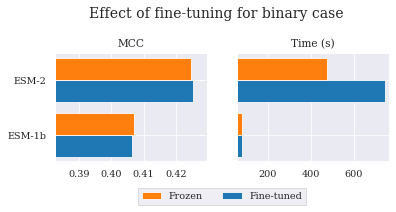

In [14]:
%matplotlib inline
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(6, 2), sharey=True)

disprot_frozen_grouped = df_fine_tune_disprot.groupby(by='group_col').mean()
sort_m = ['group_col', 'mcc']
l1, l2 = plot_frozen_metric(ax1, disprot_frozen_grouped, 'mcc', 'MCC', sort_m, min_c=0.94, max_c=1.01)
plot_frozen_metric(ax2, disprot_frozen_grouped, 'time_this_iter_s', 'Time (s)', sort_m)

ax1.legend(handles=[l2, l1], loc='upper center', bbox_to_anchor=(1.1, -0.2), fancybox=False, shadow=False, ncol=2)
fig.suptitle('Effect of fine-tuning for binary case', fontsize=14, y=1.2)
fig.savefig('../figures/2022-10-16_embeddings_compare/bars_fine_tuning_disprot.png', bbox_inches='tight')
plt.show()

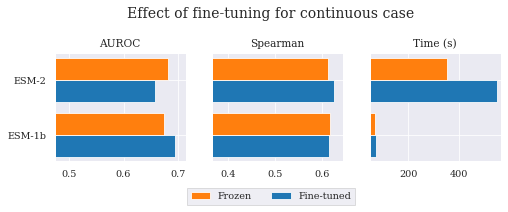

In [15]:
%matplotlib inline
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(8, 2), sharey=True)

chezod_frozen_grouped = df_fine_tune_chezod.groupby(by='group_col').mean()
sort_m = ['group_col', 'auroc']
l1, l2 = plot_frozen_metric(ax1, chezod_frozen_grouped, 'auroc', 'AUROC', sort_m)
plot_frozen_metric(ax2, chezod_frozen_grouped, 'spearman', 'Spearman', sort_m, min_c=0.6)
plot_frozen_metric(ax3, chezod_frozen_grouped, 'time_this_iter_s', 'Time (s)', sort_m)

ax1.legend(handles=[l2, l1], loc='upper center', bbox_to_anchor=(1.65, -0.2), fancybox=False, shadow=False, ncol=2)
fig.suptitle('Effect of fine-tuning for continuous case', fontsize=14, y=1.2)
fig.savefig('../figures/2022-10-16_embeddings_compare/bars_fine_tuning_chezod.png', bbox_inches='tight')
plt.show()